# Metadata Analysis

In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import re
from pandas.io.json import json_normalize

path_competitions = '../metadata/competitions.json'

df = pd.read_json(path_competitions)

df


,category,deadline,files,ref,reward,teamCount,userHasEntered
0,Getting Started,2030-01-01 00:00:00,"[{'name': 'data_description.txt', 'size': '13K...",house-prices-advanced-regression-techniques,Knowledge,4692,False
1,Getting Started,2030-01-01 00:00:00,"[{'name': 'train.csv', 'size': '73MB', 'creati...",digit-recognizer,Knowledge,2572,False
2,Getting Started,2030-01-01 00:00:00,"[{'name': 'train.csv', 'size': '60KB', 'creati...",titanic,Knowledge,10168,True
3,Research,2029-12-31 07:00:00,[{'name': 'imagenet_object_localization.tar.gz...,imagenet-object-localization-challenge,Knowledge,21,False
4,Playground,2019-01-01 23:59:00,"[{'name': 'item_categories.csv', 'size': '3KB'...",competitive-data-science-predict-future-sales,Kudos,1181,True
5,Featured,2018-10-19 23:59:00,"[{'name': 'depths.csv', 'size': '322KB', 'crea...",tgs-salt-identification-challenge,"$100,000",956,False
6,Featured,2018-10-04 23:59:00,"[{'name': 'sample_submission.csv', 'size': '2M...",airbus-ship-detection,"$60,000",212,False
7,Playground,2018-09-25 23:59:00,"[{'name': 'sample_submission.csv', 'size': '33...",new-york-city-taxi-fare-prediction,Knowledge,368,False
8,Playground,2018-09-24 23:59:00,"[{'name': 'check_correlation.csv.zip', 'size':...",flavours-of-physics-kernels-only,Knowledge,31,False
9,Playground,2018-09-24 23:59:00,"[{'name': 'test.csv.zip', 'size': '12MB', 'cre...",forest-cover-type-kernels-only,Knowledge,188,False


In [2]:
p_size = re.compile('\d+')
p_type = re.compile('\D+')

def file_size_kb(size):
    file_size=p_size.search(size).group()
    file_type=p_type.search(size).group()
    return int(file_size) * file_type_factor(file_type)


def file_type_factor(file_type):
    if file_type == 'KB':
        return 1/1024
    if file_type == 'MB':
        return 1
    if file_type == 'GB':
        return 1024
    if file_type == 'TB':
        return 1024 * 1024
    return 1

## Create Addtional File Features

Attention many files are compressed. The actual size will be bigger.

In [3]:
def file_size (row):
    fileSizes = [file_size_kb(f['size']) for f in row.files]
    return sum(fileSizes)

def file_size_without_test (row):
    fileSizes = [file_size_kb(f['size']) for f in row.files if 'test' not in f['name']]
    return sum(fileSizes)

def file_type (row):
    csv = len([f for f in row.files if 'csv' in f['name']]) == len(row.files)
    txt = len([f for f in row.files if 'txt' in f['name']]) == len(row.files)
    json = len([f for f in row.files if 'json' in f['name']]) == len(row.files)

    image = len([f for f in row.files if 'jpg' in f['name']]) > 0
    
    if csv:
        return 'csv'
    if txt:
        return 'txt'
    if json:
        return 'json'
    if image:
        return 'image'
    return 'other'

df['fileCount'] = df.apply (lambda row: len(row.files),axis=1) 
df['fileSizeMB'] = df.apply (lambda row: file_size(row),axis=1)
df['fileSizeWithoutTestSetMB'] = df.apply (lambda row: file_size_without_test(row),axis=1)

df['fileType'] = df.apply (lambda row: file_type(row),axis=1)

df.head()

,category,deadline,files,ref,reward,teamCount,userHasEntered,fileCount,fileSizeMB,fileSizeWithoutTestSetMB,fileType
0,Getting Started,2030-01-01 00:00:00,"[{'name': 'data_description.txt', 'size': '13K...",house-prices-advanced-regression-techniques,Knowledge,4692,False,7,1.094727,0.583984,other
1,Getting Started,2030-01-01 00:00:00,"[{'name': 'train.csv', 'size': '73MB', 'creati...",digit-recognizer,Knowledge,2572,False,3,122.229492,73.229492,csv
2,Getting Started,2030-01-01 00:00:00,"[{'name': 'train.csv', 'size': '60KB', 'creati...",titanic,Knowledge,10168,True,3,0.088867,0.061523,csv
3,Research,2029-12-31 07:00:00,[{'name': 'imagenet_object_localization.tar.gz...,imagenet-object-localization-challenge,Knowledge,21,False,5,158727.197266,158727.197266,other
4,Playground,2019-01-01 23:59:00,"[{'name': 'item_categories.csv', 'size': '3KB'...",competitive-data-science-predict-future-sales,Kudos,1181,True,6,15.463867,14.463867,csv


<IPython.core.display.Javascript object>


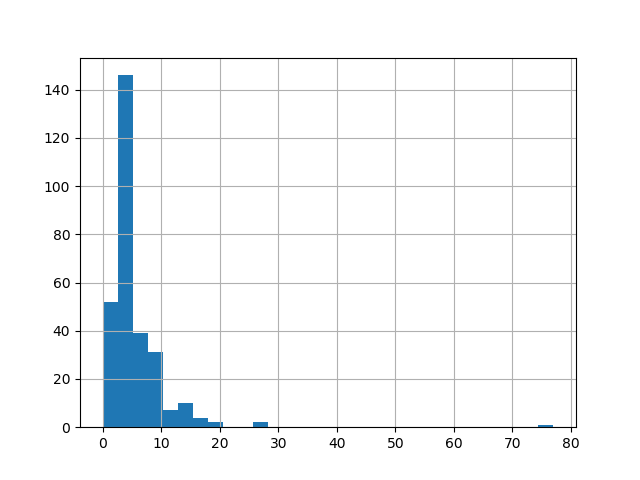

In [4]:
df['fileCount'].hist(bins=30)

In [5]:
df['fileSizeMB'].describe()

count       294.000000
mean       5549.453049
std       19257.371660
min           0.000000
25%           7.012451
50%         121.114746
75%        1033.830566
max      158727.197266
Name: fileSizeMB, dtype: float64

In [6]:
df['fileCount'].describe()

count    294.000000
mean       5.370748
std        5.839897
min        0.000000
25%        3.000000
50%        4.000000
75%        6.000000
max       77.000000
Name: fileCount, dtype: float64

In [7]:
df['fileType'].value_counts()

other    170
csv      119
image      4
txt        1
Name: fileType, dtype: int64

In [8]:
# All only csv competitions
dfcsv = df.loc[df['fileType'] == 'csv']

dfcsv['fileCount'].describe()

count    119.000000
mean       3.327731
std        2.463666
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max       11.000000
Name: fileCount, dtype: float64

In [9]:
for files in df.files[:10]:
    print('---')
    for f in files:
        print(f['name'])

---
data_description.txt
train.csv.gz
train.csv
test.csv.gz
test.csv
sample_submission.csv.gz
sample_submission.csv
---
train.csv
test.csv
sample_submission.csv
---
train.csv
test.csv
gender_submission.csv
---
imagenet_object_localization.tar.gz
LOC_sample_submission.csv.zip
LOC_val_solution.csv.zip
LOC_train_solution.csv.zip
LOC_synset_mapping.txt.zip
---
item_categories.csv
items.csv
shops.csv
sample_submission.csv.gz
test.csv.gz
sales_train.csv.gz
---
depths.csv
sample_submission.csv
train.csv
test.zip
train.zip
---
sample_submission.csv
train_ship_segmentations.csv
test.zip
train.zip
---
sample_submission.csv
test.csv
train.csv
GCP-Coupons-Instructions.rtf
---
check_correlation.csv.zip
sample_submission.csv.zip
training.csv.zip
check_agreement.csv.zip
test.csv.zip
---
test.csv.zip
train.csv.zip
sample_submission.csv.zip


# Read Leaderboard

In [10]:
path_leaderboard = '../metadata/leaderboards.json'

dflb = pd.read_json(path_leaderboard)

dflb['best'] = pd.to_numeric(dflb['best'], errors='coerce')

dflb.head()

,best,ref,top
0,0.00000,house-prices-advanced-regression-techniques,"[{'teamId': 1780632, 'teamName': 'GroundTruth'..."
1,1.00000,digit-recognizer,"[{'teamId': 1738338, 'teamName': 'Xianbin Guo'..."
2,1.00000,titanic,"[{'teamId': 1711461, 'teamName': 'povahagn', '..."
3,0.03008,imagenet-object-localization-challenge,"[{'teamId': 1826466, 'teamName': 'Yohnkey', 's..."
4,0.85686,competitive-data-science-predict-future-sales,"[{'teamId': 1597395, 'teamName': 'Pieter Volos..."


## Combine Leaderboard and Competitions

In [11]:
df['best'] = df.apply (lambda row: dflb[dflb.ref == row.ref].iloc[0].best,axis=1)

df

,category,deadline,files,ref,reward,teamCount,userHasEntered,fileCount,fileSizeMB,fileSizeWithoutTestSetMB,fileType,best
0,Getting Started,2030-01-01 00:00:00,"[{'name': 'data_description.txt', 'size': '13K...",house-prices-advanced-regression-techniques,Knowledge,4692,False,7,1.094727,0.583984,other,0.000000
1,Getting Started,2030-01-01 00:00:00,"[{'name': 'train.csv', 'size': '73MB', 'creati...",digit-recognizer,Knowledge,2572,False,3,122.229492,73.229492,csv,1.000000
2,Getting Started,2030-01-01 00:00:00,"[{'name': 'train.csv', 'size': '60KB', 'creati...",titanic,Knowledge,10168,True,3,0.088867,0.061523,csv,1.000000
3,Research,2029-12-31 07:00:00,[{'name': 'imagenet_object_localization.tar.gz...,imagenet-object-localization-challenge,Knowledge,21,False,5,158727.197266,158727.197266,other,0.030080
4,Playground,2019-01-01 23:59:00,"[{'name': 'item_categories.csv', 'size': '3KB'...",competitive-data-science-predict-future-sales,Kudos,1181,True,6,15.463867,14.463867,csv,0.856860
5,Featured,2018-10-19 23:59:00,"[{'name': 'depths.csv', 'size': '322KB', 'crea...",tgs-salt-identification-challenge,"$100,000",956,False,5,202.472656,39.472656,other,0.851000
6,Featured,2018-10-04 23:59:00,"[{'name': 'sample_submission.csv', 'size': '2M...",airbus-ship-detection,"$60,000",212,False,4,26655.000000,14367.000000,other,0.951000
7,Playground,2018-09-25 23:59:00,"[{'name': 'sample_submission.csv', 'size': '33...",new-york-city-taxi-fare-prediction,Knowledge,368,False,4,5607.264648,5606.327148,other,2.859430
8,Playground,2018-09-24 23:59:00,"[{'name': 'check_correlation.csv.zip', 'size':...",flavours-of-physics-kernels-only,Knowledge,31,False,5,417.000000,144.000000,csv,1.000000
9,Playground,2018-09-24 23:59:00,"[{'name': 'test.csv.zip', 'size': '12MB', 'cre...",forest-cover-type-kernels-only,Knowledge,188,False,3,13.342773,1.342773,csv,1.000000


In [21]:
# Find Correlations

filterdf = df.query("0 <= best <= 1 and fileType == 'csv' and teamCount < 1000")
filterdf.corr()['best'].sort_values()

fileSizeWithoutTestSetMB    0.027133
fileSizeMB                  0.027270
fileCount                   0.051139
teamCount                   0.160262
best                        1.000000
userHasEntered                   NaN
Name: best, dtype: float64

<IPython.core.display.Javascript object>


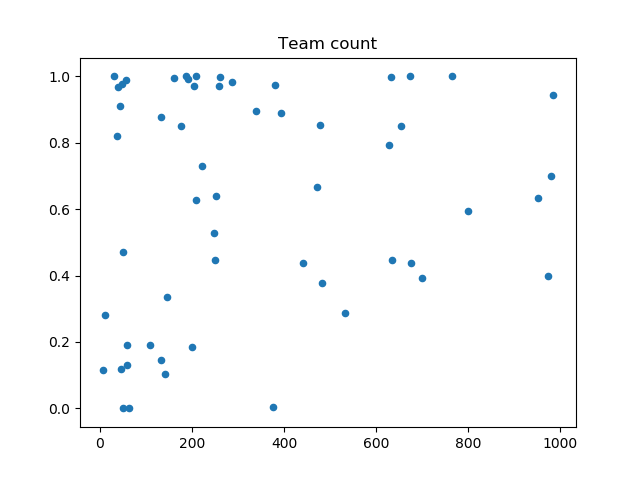

In [22]:
# Team count
plt.figure()
plt.title('Team count')
plt.scatter(filterdf['teamCount'], filterdf['best'], marker= 'o', s=20)
plt.show()


In [29]:
# Total file size (compressed)
print("{:.2f} GB".format(df.fileSizeMB.sum() / 1024))

1593.30 GB


In [43]:
# Small data sets

smalldf = df.query("fileSizeMB < 100")

print("{:.2f} GB".format(smalldf.fileSizeMB.sum() / 1024))

smalldf.shape

for ref in df['ref']:
    print('https://www.kaggle.com/c/{}/rules'.format(ref))
    
df.shape

2.42 GB
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/rules
https://www.kaggle.com/c/digit-recognizer/rules
https://www.kaggle.com/c/titanic/rules
https://www.kaggle.com/c/imagenet-object-localization-challenge/rules
https://www.kaggle.com/c/competitive-data-science-predict-future-sales/rules
https://www.kaggle.com/c/tgs-salt-identification-challenge/rules
https://www.kaggle.com/c/airbus-ship-detection/rules
https://www.kaggle.com/c/new-york-city-taxi-fare-prediction/rules
https://www.kaggle.com/c/flavours-of-physics-kernels-only/rules
https://www.kaggle.com/c/forest-cover-type-kernels-only/rules
https://www.kaggle.com/c/whats-cooking-kernels-only/rules
https://www.kaggle.com/c/movie-review-sentiment-analysis-kernels-only/rules
https://www.kaggle.com/c/demand-forecasting-kernels-only/rules
https://www.kaggle.com/c/costa-rican-household-poverty-prediction/rules
https://www.kaggle.com/c/google-ai-open-images-object-detection-track/rules
https://www.kaggle.com/c/goo

(294, 12)

In [42]:
for ref in smalldf['ref']:
    print('"{}",'.format(ref))


"house-prices-advanced-regression-techniques",
"titanic",
"competitive-data-science-predict-future-sales",
"forest-cover-type-kernels-only",
"whats-cooking-kernels-only",
"movie-review-sentiment-analysis-kernels-only",
"demand-forecasting-kernels-only",
"costa-rican-household-poverty-prediction",
"youtube8m-2018",
"inaturalist-2018",
"imaterialist-challenge-fashion-2018",
"imaterialist-challenge-furniture-2018",
"landmark-recognition-challenge",
"womens-machine-learning-competition-2018",
"jigsaw-toxic-comment-classification-challenge",
"nomad2018-predict-transparent-conductors",
"recruit-restaurant-visitor-forecasting",
"spooky-author-identification",
"cdiscount-image-classification-challenge",
"porto-seguro-safe-driver-prediction",
"text-normalization-challenge-english-language",
"nips-2017-non-targeted-adversarial-attack",
"nips-2017-targeted-adversarial-attack",
"nips-2017-defense-against-adversarial-attack",
"nyc-taxi-trip-duration",
"mercedes-benz-greener-manufacturing",
"inatura